# Assignment 4

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
assert tf.__version__ >= "2.0"

## Question 1 Image Classification (40 points)

In this question, you are simply asked to follow the tutorials on the Tensorflow to familiarize with the Tensorflow and Neural networks. 

Finish two tutorials by replicating the steps:

1) Image classification (20 points) (https://www.tensorflow.org/tutorials/images/classification)

2) Transfer learning with pretrained model (20 points) (https://www.tensorflow.org/tutorials/images/transfer_learning)

 After you finish all steps, prepare two images, one dog image and one cat image and see whether your model would predict correctly. 


### Question 1.1 Image classification

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

import matplotlib.pyplot as plt

In [0]:
## STEP 1, Download the data and generate Train + Test Sets

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 0s 0us/step


In [0]:
## extract the training and validation sets
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
## 
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
## variables to use while pre-processing the dataset and training the network
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
## STEP 2, Data curation/cleaning

`ImageDataGenerator` does the following task: 
    1. Read images from the disk.
    2. Decode contents of these images and convert it into proper grid format as per their RGB content.
    3. Convert them into floating point tensors.
    4. Rescale the tensors into (0,1)

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [0]:
## reshape the images 
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
## visualize some of them with function "next"

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
## This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten() ## crate a vector from a matrix
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

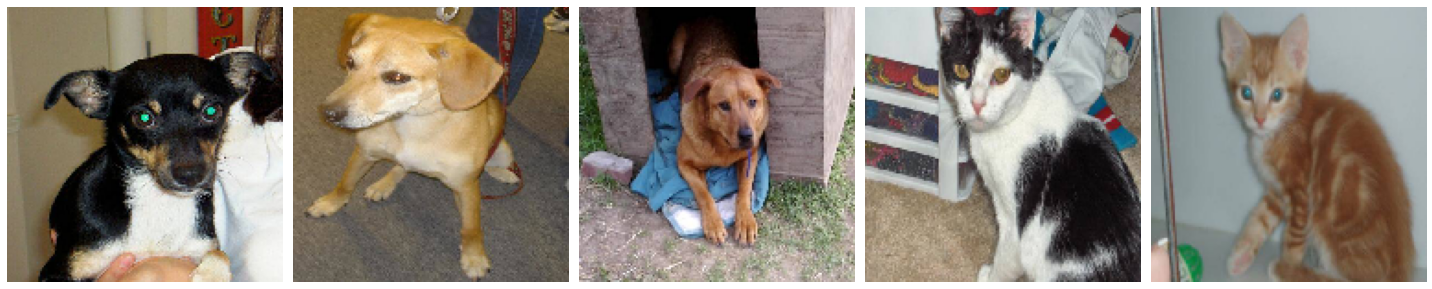

In [0]:
plotImages(sample_training_images[:5])

The **model consists** of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 512 units on top of it that is activated by a relu activation function.

In [0]:
## STEP 3, Build the Model and train the algorithm
model = Sequential([
    Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1)
])

In [0]:
model.compile(optimizer='adam',  ## Adam Optimized and binary cross entropy loss function
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)            

In [0]:
## Training the model
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/15
15/15 [==============================] - 48s 3s/step - loss: 0.8256 - accuracy: 0.5144 - val_loss: 0.6854 - val_accuracy: 0.5134
Epoch 2/15
15/15 [==============================] - 48s 3s/step - loss: 0.6766 - accuracy: 0.5198 - val_loss: 0.6412 - val_accuracy: 0.5926
Epoch 3/15
15/15 [==============================] - 49s 3s/step - loss: 0.6528 - accuracy: 0.5929 - val_loss: 0.6327 - val_accuracy: 0.5759
Epoch 4/15
15/15 [==============================] - 48s 3s/step - loss: 0.6089 - accuracy: 0.6255 - val_loss: 0.5900 - val_accuracy: 0.6417
Epoch 5/15
15/15 [==============================] - 48s 3s/step - loss: 0.5449 - accuracy: 0.6987 - val_loss: 0.5609 - val_accuracy: 0.6942
Epoch 6/15
15/15 [==============================] - 48s 3s/step - loss: 0.5009 - accuracy: 0.7217 - val_loss: 0.5569 - val_accuracy: 0.7143
Epoch 7/15
15/15 [==============================] - 48s 3s/step - loss: 0.4807 - accuracy: 0.7516 - val_loss: 0.5371 - val_accuracy: 0.7377
Epoch 8/15
15/15 [==

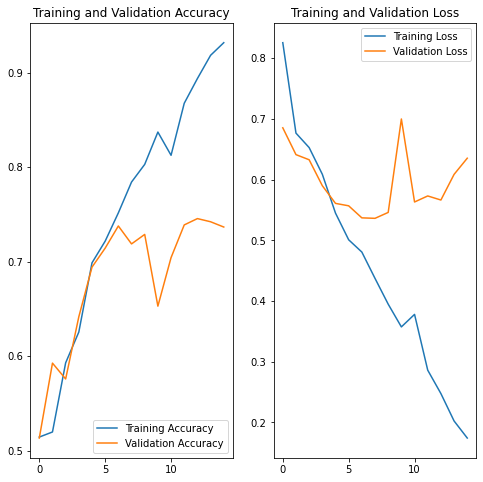

In [0]:
## accuracy train vs validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 70% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

In [0]:
## STEP 4, Resolve the Overfitting with data augmentation and dropout

Found 2000 images belonging to 2 classes.


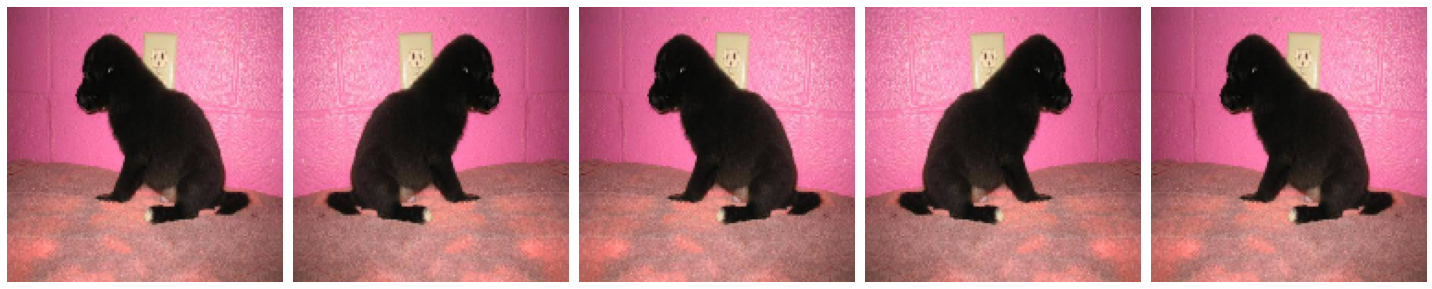

In [0]:
## Data augmentation

#Apply horizontal flip:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True) #Set horizontal_flip = True to apply this augmentation.

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


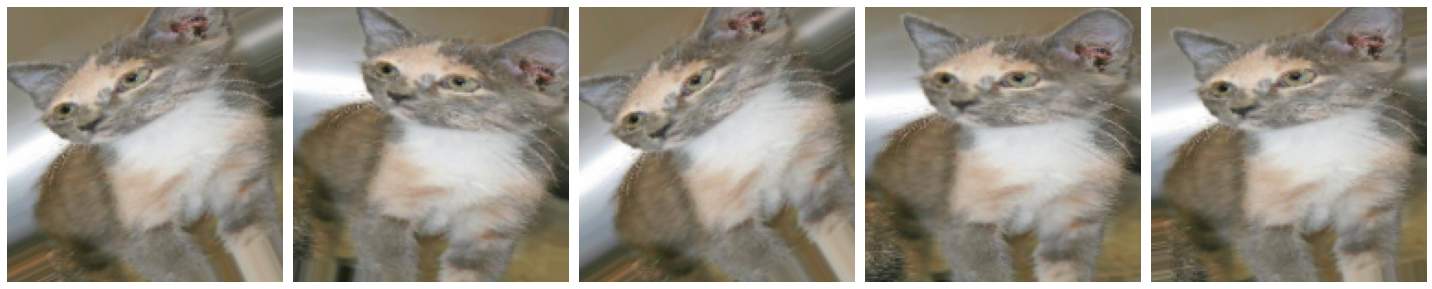

In [0]:
# Apply 45 degrees of rotation randomly:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


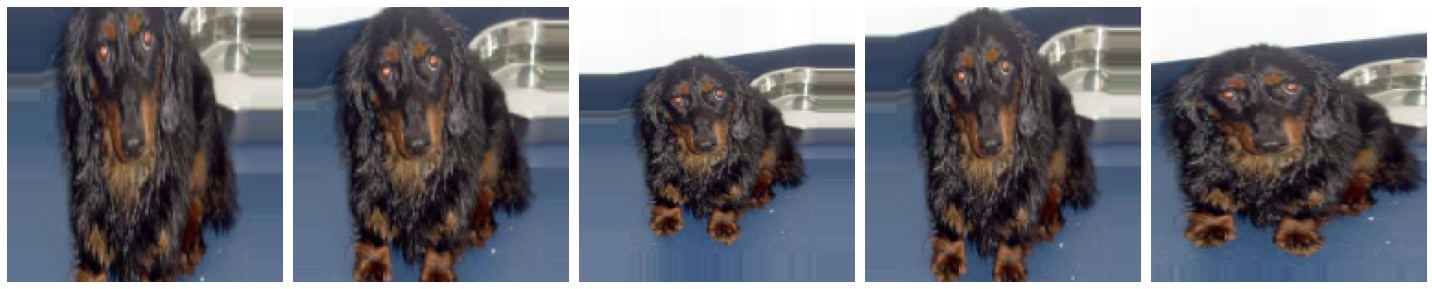

In [0]:
# Apply zoom augmentation up to 50%

# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


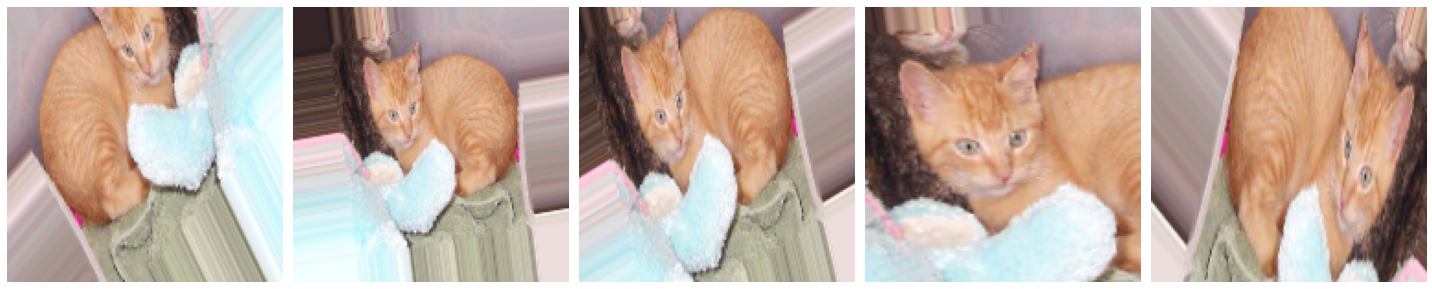

In [0]:
# Collect together the augmentations:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
## rescale the validation images and convert them into batches using "ImageDataGenerator"
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
## Dropout

model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [0]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [0]:
## STEP 5, Train the final model

history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 58s 4s/step - loss: 1.8633 - accuracy: 0.4943 - val_loss: 0.6928 - val_accuracy: 0.4944
Epoch 2/15
15/15 [==============================] - 58s 4s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5011
Epoch 3/15
15/15 [==============================] - 57s 4s/step - loss: 0.6929 - accuracy: 0.4920 - val_loss: 0.6922 - val_accuracy: 0.4933
Epoch 4/15
15/15 [==============================] - 59s 4s/step - loss: 0.6937 - accuracy: 0.5016 - val_loss: 0.6908 - val_accuracy: 0.4866
Epoch 5/15
15/15 [==============================] - 57s 4s/step - loss: 0.6937 - accuracy: 0.5080 - val_loss: 0.6907 - val_accuracy: 0.5011
Epoch 6/15
15/15 [==============================] - 57s 4s/step - loss: 0.6895 - accuracy: 0.4973 - val_loss: 0.6853 - val_accuracy: 0.4978
Epoch 7/15
15/15 [==============================] - 57s 4s/step - loss: 0.6871 - accuracy: 0.5043 - val_loss: 0.6835 - val_accuracy: 0.5011
Epoch 8/15
15/15 [==

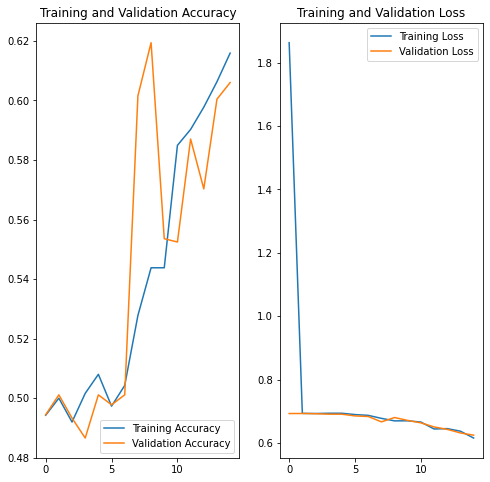

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Question 1.2 Transfer learning

In [0]:
## STEP 1, Load the data

In [0]:
## import pictures from cat and dogs
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

## subsplit feature to divide it into (train, validation, test) with 80%, 10%, and 10% of the data respectively.
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteUNGF0V/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


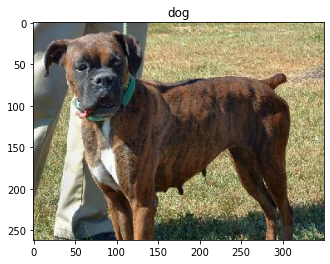

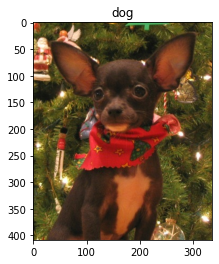

In [0]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
              plt.figure()
              plt.imshow(image)
              plt.title(get_label_name(label))

In [0]:
## resize the pictures and rescale the input channels to a range of [-1,1]

IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [0]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [0]:
##  shuffle and batch the data.
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [0]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 160, 160, 3])

In [0]:
## Loading ... "MobileNet V2" pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes.
## which will helps to classify cats and dogs from our specific dataset.

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               ## include_top=False argument, 
                                               ##you load a network that doesn't include the classification 
                                               ##layers at the top, which is ideal for feature extraction.
                                               include_top=False,
                                               weights='imagenet')
feature_batch = base_model(image_batch)
print(feature_batch.shape)

9412608/9406464 [==============================] - 0s 0us/step
(32, 5, 5, 1280)


In [0]:
## STEP 2, Features extractions:

# freeze (by setting layer.trainable = False) the convolutional base created from the previous step and 
# to use as a feature extractor.
# Additionally, you add a classifier on top of it and train the top-level classifier.

In [0]:
base_model.trainable = False
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
## To generate predictions from the block of features, average over the spatial 5x5 spatial locations, 
## using a tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image.

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [0]:
## Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image. 
## Don't need an activation function here because this prediction will be treated as a logit, or a raw prediction value.
## Positive numbers predict class 1, negative numbers predict class 0.
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [0]:
## Stack the feature extractor, and these two layers using a tf.keras.Sequential model:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [0]:
## STEP 3, Compile and Train the model

In [0]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.summary()
## The 2.5M parameters in MobileNet are frozen, but there are 1.2K trainable parameters in the Dense layer. 
## These are divided between two tf.Variable objects, the weights and biases.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
initial_epochs = 10
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 11s 565ms/step - loss: 0.9130 - accuracy: 0.3969


In [0]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.91
initial accuracy: 0.40


In [0]:
history = model.fit(train_batches, epochs=initial_epochs, validation_data=validation_batches)

Epoch 1/10
582/582 [==============================] - 388s 666ms/step - loss: 0.2484 - accuracy: 0.8810 - val_loss: 0.0897 - val_accuracy: 0.9690
Epoch 2/10
582/582 [==============================] - 390s 670ms/step - loss: 0.0731 - accuracy: 0.9747 - val_loss: 0.0623 - val_accuracy: 0.9755
Epoch 3/10
582/582 [==============================] - 385s 662ms/step - loss: 0.0578 - accuracy: 0.9792 - val_loss: 0.0541 - val_accuracy: 0.9794
Epoch 4/10
582/582 [==============================] - 382s 657ms/step - loss: 0.0516 - accuracy: 0.9808 - val_loss: 0.0502 - val_accuracy: 0.9811
Epoch 5/10
582/582 [==============================] - 384s 659ms/step - loss: 0.0481 - accuracy: 0.9821 - val_loss: 0.0481 - val_accuracy: 0.9819
Epoch 6/10
582/582 [==============================] - 381s 655ms/step - loss: 0.0458 - accuracy: 0.9829 - val_loss: 0.0466 - val_accuracy: 0.9837
Epoch 7/10
582/582 [==============================] - 383s 659ms/step - loss: 0.0441 - accuracy: 0.9837 - val_loss: 0.0456 -

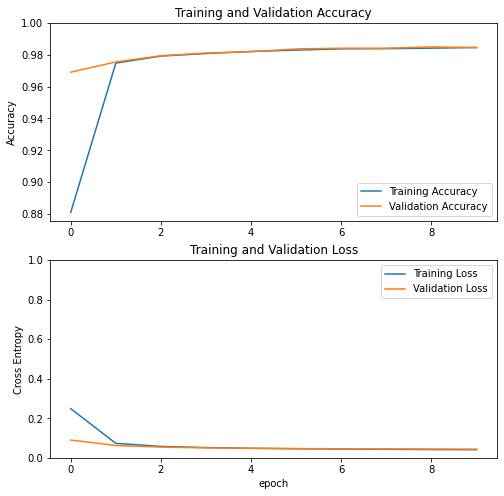

In [0]:
## Plot Learning Curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
## STEP 4, Fine tuning

train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

In [0]:
base_model.trainable = True

In [0]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [0]:
## training 
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=validation_batches)

Epoch 10/20
582/582 [==============================] - 673s 1s/step - loss: 0.1171 - accuracy: 0.9559 - val_loss: 0.0615 - val_accuracy: 0.9811
Epoch 11/20
582/582 [==============================] - 674s 1s/step - loss: 0.0686 - accuracy: 0.9731 - val_loss: 0.0494 - val_accuracy: 0.9832
Epoch 12/20
582/582 [==============================] - 677s 1s/step - loss: 0.0500 - accuracy: 0.9816 - val_loss: 0.0478 - val_accuracy: 0.9854
Epoch 13/20
582/582 [==============================] - 676s 1s/step - loss: 0.0365 - accuracy: 0.9860 - val_loss: 0.0468 - val_accuracy: 0.9850
Epoch 14/20
582/582 [==============================] - 683s 1s/step - loss: 0.0312 - accuracy: 0.9881 - val_loss: 0.0472 - val_accuracy: 0.9832
Epoch 15/20
582/582 [==============================] - 681s 1s/step - loss: 0.0220 - accuracy: 0.9914 - val_loss: 0.0515 - val_accuracy: 0.9819
Epoch 16/20
582/582 [==============================] - 679s 1s/step - loss: 0.0174 - accuracy: 0.9937 - val_loss: 0.0508 - val_accuracy:

In [0]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

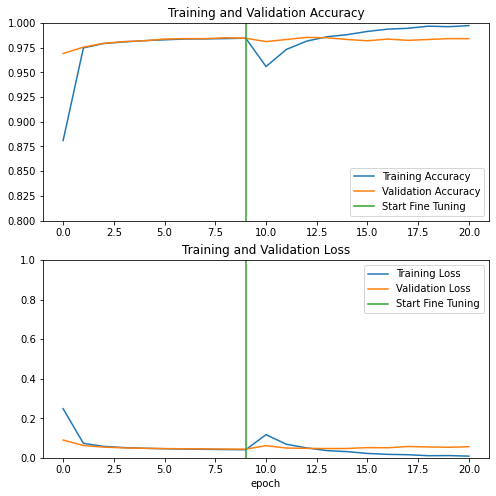

In [0]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Take away: 

* **Using a pre-trained model for feature extraction**:  When working with a small dataset, it is a common practice to take advantage of features learned by a model trained on a larger dataset in the same domain. This is done by instantiating the pre-trained model and adding a fully-connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier get updated during training.
In this case, the convolutional base extracted all the features associated with each image and you just trained a classifier that determines the image class given that set of extracted features.

* **Fine-tuning a pre-trained model**: To further improve performance, one might want to repurpose the top-level layers of the pre-trained models to the new dataset via fine-tuning.
In this case, you tuned your weights such that your model learned high-level features specific to the dataset. This technique is usually recommended when the training dataset is large and very similar to the original dataset that the pre-trained model was trained on.


In [0]:
from google.colab import files
from io import BytesIO
from PIL import Image
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['IMG-20170907-WA0001.jpg']))

Saving IMG-20170907-WA0001.jpg to IMG-20170907-WA0001 (3).jpg


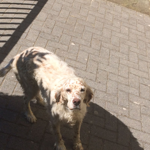

In [0]:
dog= im.resize((150,150))
dog

In [0]:
dog=np.array(dog)/255.0

In [0]:
dog.shape

(150, 150, 3)

In [0]:
result= model_new.predict(dog[np.newaxis, ...])
result

array([[-0.613654]], dtype=float32)

In [0]:
val_data_gen.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
def label_finder(result):
  if result >0: 
    res="The algorithm predicted as DOG!"
  else:
    res="The algorithm predicted as CAT!"
  return res


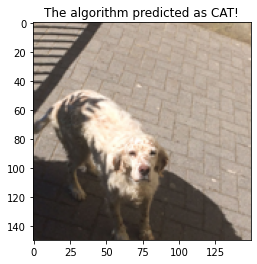

In [0]:
plt.imshow(dog)
_ = plt.title(label_finder(result=result))

The Immage classification model does not correcltly recognize the dog. <br>
PS: I had no idea that my dog was a cat, I did not realize it for 14 years ! 

In [0]:
# doing the same with a cat picture
uploaded = files.upload()
im1 = Image.open(BytesIO(uploaded['IMG_20200514_132723.jpg']))

Saving IMG_20200514_132723.jpg to IMG_20200514_132723 (1).jpg


In [0]:
cat= im1.resize((150,150))
cat=np.array(cat)/255.0

In [0]:
result= model_new.predict(cat[np.newaxis, ...])
def label_finder(result):
  if result >0: 
    res="The algorithm predicted as DOG!"
  else:
    res="The algorithm predicted as CAT!"
  return res

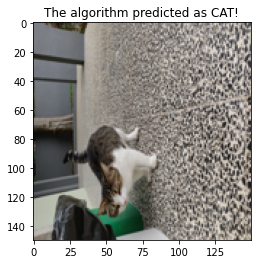

In [0]:
plt.imshow(cat)
_ = plt.title(label_finder(result=result))

The immage classification model correcltly recognize the cat, even if the picture was altered a little bit - by rotating it at  45 degrees.

## Question 2 Bag of Tricks (60 points)

Practice training a deep neural network on the CIFAR10 image dataset:


### Question 2.1 (20 points) 

Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_ data() (see code below). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 5000 of which is for validation, 10,000 for testing) with 10 classes using sparse_categorical_crossentropy loss function , so you’ll need a softmax output layer with 10 neurons. 

Train the model for 100 epochs, explain whether the model will experience overfitting. 


In [0]:
# TensorFlow ≥2.0 is required
# import tensorflow as tf
# from tensorflow import keras
# assert tf.__version__ >= "2.0"

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170500096/170498071 [==============================] - 3s 0us/step


In [0]:
## (DNN) with 20 hidden layers of 100 neurons each
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 ## activation functio ReLU
                                 activation="relu")) 

## softmax output layer with 10 neurons
model.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
## Adam optimization
optimizer = keras.optimizers.Adam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
## Early Stopping
#early_stopping = keras.callbacks.EarlyStopping(patience=15) 
# "patience" Number of epochs with no improvement after which training will be stopped.

In [0]:
history1=model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))#, callbacks=[early_stopping])

Epoch 1/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.1165 - accuracy: 0.1697 - val_loss: 2.0780 - val_accuracy: 0.1936
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.0354 - accuracy: 0.1953 - val_loss: 2.0310 - val_accuracy: 0.2026
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.0099 - accuracy: 0.2034 - val_loss: 2.0097 - val_accuracy: 0.1980
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9891 - accuracy: 0.2116 - val_loss: 2.0563 - val_accuracy: 0.2074
Epoch 5/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9666 - accuracy: 0.2204 - val_loss: 1.9534 - val_accuracy: 0.2246
Epoch 6/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9468 - accuracy: 0.2332 - val_loss: 1.9554 - val_accuracy: 0.2412
Epoch 7/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9326 - accuracy: 0.2412 - val_loss: 1.9304 -

In [0]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.9934 - accuracy: 0.2238


[1.9933847188949585, 0.22380000352859497]

The model with the lowest validation loss gets about 22% accuracy on the validation set. It took roughly 10 seconds per epoch. 


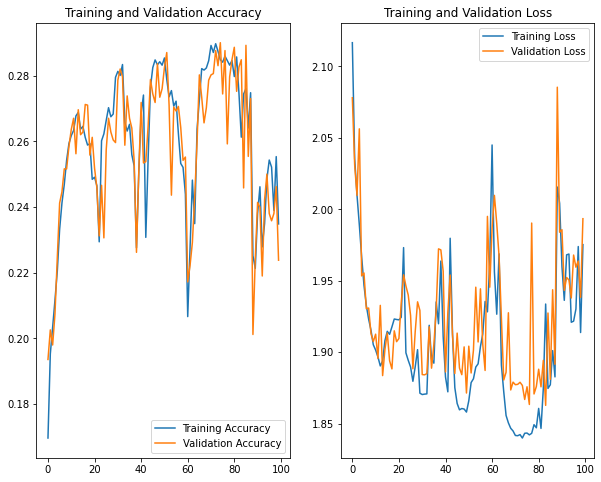

In [0]:
## accuracy train vs validation
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From the learning curve the model does not overfits. Only on the last epochs the curves diverge a little bit, but the loss for training and validation remain low.

### Question 2.2 (10 points)

Try reduce the overfitting with weight regularization. You can try to add a L2-norm penalty term as the kernel_regularizer. Repeat the previous training process and explain whether regularization helps achieve a better result.

In [0]:
from tensorflow.keras import regularizers

In [0]:


keras.backend.clear_session()
## (DNN) with 20 hidden layers of 100 neurons each
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 ## L2-norm penalty regularization
                                 kernel_regularizer=regularizers.l2(0.001),
                                 activation="relu"))
              
## softmax output layer with 10 neurons
model.add(keras.layers.Dense(10, activation="softmax"))

## Adam optimization
optimizer = keras.optimizers.Adam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
## Early Stopping
early_stopping = keras.callbacks.EarlyStopping(patience=15) 
# "patience" Number of epochs with no improvement after which training will be stopped.

In [0]:
history2= model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))#, callbacks=[early_stopping])

Epoch 1/100
1407/1407 [==============================] - 12s 8ms/step - loss: 2.4876 - accuracy: 0.1720 - val_loss: 2.1612 - val_accuracy: 0.1946
Epoch 2/100
1407/1407 [==============================] - 12s 8ms/step - loss: 2.1029 - accuracy: 0.1957 - val_loss: 2.0700 - val_accuracy: 0.1842
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.0557 - accuracy: 0.2078 - val_loss: 2.0873 - val_accuracy: 0.2044
Epoch 5/100
1407/1407 [==============================] - 12s 8ms/step - loss: 2.0458 - accuracy: 0.2141 - val_loss: 2.0347 - val_accuracy: 0.2226
Epoch 6/100
1407/1407 [==============================] - 12s 8ms/step - loss: 2.0350 - accuracy: 0.2164 - val_loss: 2.0400 - val_accuracy: 0.2240
Epoch 7/100
1407/1407 [==============================] - 12s 8ms/step - loss: 2.0283 - accuracy: 0.2148 - val_loss: 2.1048 - val_accuracy: 0.2166
Epoch 8/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.0251 - accuracy: 0.2211 - val_loss: 2.0226 -

In [0]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 2.0085 - accuracy: 0.2504


[2.008484125137329, 0.25040000677108765]

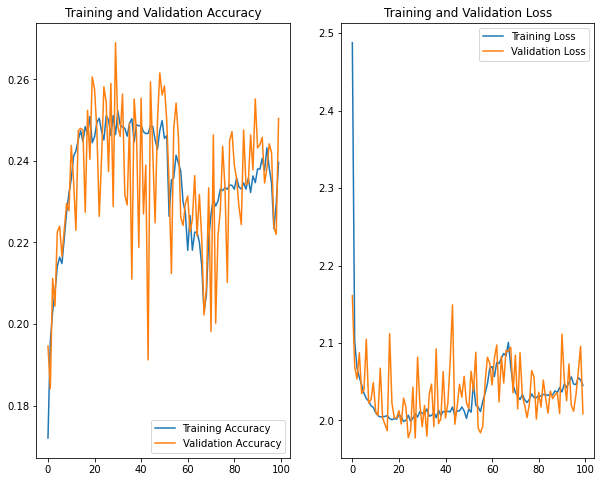

In [0]:
## accuracy train vs validation
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The learning curve does not seems to have a strong overfitting issue. However, by using regurlarization the variance of the valuation accuracy and loss is substantially higher than the training. 

The regurlarization with Ridge L2 (0.001) seems to achieve a slightly better results. Indeed, 25% of accuracy rate on validation. Finally, it takes more time - about 1/2 seconds - for training each epoch. 

### Question 2.3 (10 points)

Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [0]:
## (DNN) with 20 hidden layers of 100 neurons each
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_regularizer=regularizers.l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))

## softmax output layer with 10 neurons
model.add(keras.layers.Dense(10, activation="softmax"))

## Adam optimization
optimizer = keras.optimizers.Adam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
## Early Stopping
#early_stopping = keras.callbacks.EarlyStopping(patience=15) 
# "patience" Number of epochs with no improvement after which training will be stopped.

In [0]:
history3=model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))#, callbacks=[early_stopping])

Epoch 1/100
1407/1407 [==============================] - 23s 16ms/step - loss: 4.0791 - accuracy: 0.2195 - val_loss: 3.6098 - val_accuracy: 0.3088
Epoch 2/100
1407/1407 [==============================] - 22s 16ms/step - loss: 3.3472 - accuracy: 0.3094 - val_loss: 3.0293 - val_accuracy: 0.3224
Epoch 3/100
1407/1407 [==============================] - 23s 16ms/step - loss: 2.7808 - accuracy: 0.3382 - val_loss: 2.5330 - val_accuracy: 0.3486
Epoch 4/100
1407/1407 [==============================] - 23s 16ms/step - loss: 2.4125 - accuracy: 0.3442 - val_loss: 2.3305 - val_accuracy: 0.3424
Epoch 5/100
1407/1407 [==============================] - 23s 16ms/step - loss: 2.2507 - accuracy: 0.3299 - val_loss: 2.3969 - val_accuracy: 0.2764
Epoch 6/100
1407/1407 [==============================] - 23s 16ms/step - loss: 2.2247 - accuracy: 0.2919 - val_loss: 2.1196 - val_accuracy: 0.3108
Epoch 7/100
1407/1407 [==============================] - 22s 16ms/step - loss: 2.1799 - accuracy: 0.2797 - val_loss: 2

In [0]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.7410 - accuracy: 0.4094


[1.74098539352417, 0.40939998626708984]


The BN model is much better, with 41% accuracy rate instead of 25%. However, each epoch took about 20s instead of 10s, because of the extra computations required by the BN layers.


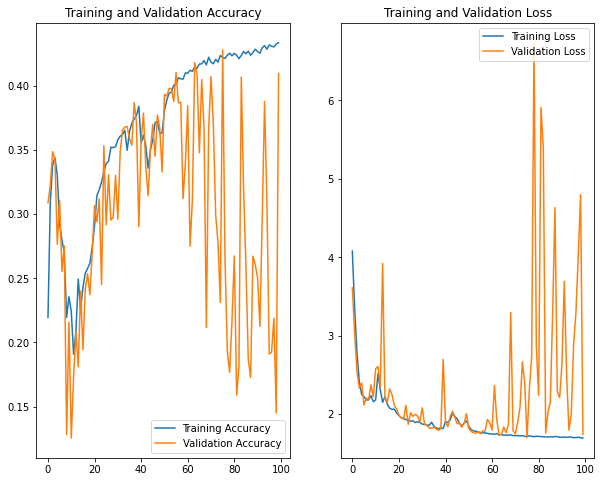

In [0]:
## accuracy train vs validation
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss=history3.history['loss']
val_loss=history3.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Looking at the learning curve it is possible to observe that the Batch Normalization increase the overfitting respect the previous model. Perhaps adding an early stopping - which stops between 50-55 epochs- would  partially resolve the issue. 

### Question 2.4 (10 points)

Try regularizing the model with dropout. Then see if you can achieve better accuracy using different rate of Dropout.

In [0]:
## (DNN) with 20 hidden layers of 100 neurons each
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_regularizer=regularizers.l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))
    
## Dropout rate 25%
model.add(keras.layers.Dropout(rate=0.25))
## softmax output layer with 10 neurons
model.add(keras.layers.Dense(10, activation="softmax"))

## Adam optimization
optimizer = keras.optimizers.Adam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
## Early Stopping
# early_stopping = keras.callbacks.EarlyStopping(patience=15) 
# "patience" Number of epochs with no improvement after which training will be stopped.


In [0]:
history4= model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))#, callbacks=[early_stopping])

Epoch 1/100
1407/1407 [==============================] - 23s 17ms/step - loss: 4.1622 - accuracy: 0.1963 - val_loss: 3.6977 - val_accuracy: 0.2920
Epoch 2/100
1407/1407 [==============================] - 23s 17ms/step - loss: 3.4525 - accuracy: 0.2973 - val_loss: 3.1029 - val_accuracy: 0.3390
Epoch 3/100
1407/1407 [==============================] - 24s 17ms/step - loss: 2.8993 - accuracy: 0.3280 - val_loss: 2.6392 - val_accuracy: 0.3246
Epoch 4/100
1407/1407 [==============================] - 23s 16ms/step - loss: 2.5090 - accuracy: 0.3334 - val_loss: 2.3386 - val_accuracy: 0.3170
Epoch 5/100
1407/1407 [==============================] - 23s 17ms/step - loss: 2.2865 - accuracy: 0.3256 - val_loss: 2.1917 - val_accuracy: 0.3154
Epoch 6/100
1407/1407 [==============================] - 23s 17ms/step - loss: 2.1837 - accuracy: 0.3077 - val_loss: 2.2505 - val_accuracy: 0.2966
Epoch 7/100
1407/1407 [==============================] - 26s 18ms/step - loss: 2.1909 - accuracy: 0.2820 - val_loss: 2

In [0]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 5.4246 - accuracy: 0.1824


[5.424585342407227, 0.18240000307559967]

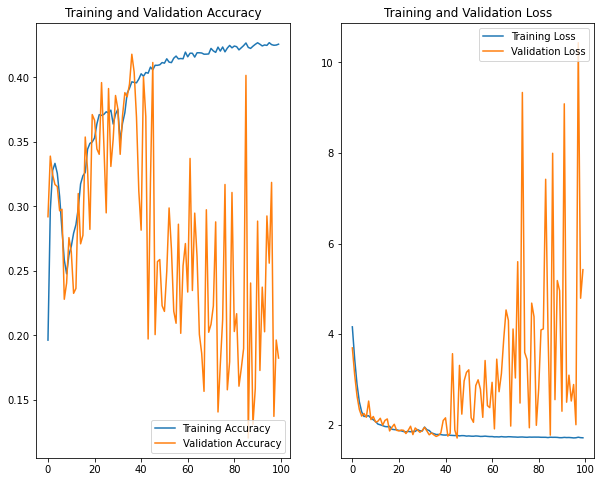

In [0]:
## accuracy train vs validation
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss=history4.history['loss']
val_loss=history4.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The dropout at 25% seems to generate overfitting issue. The training and validation are diverging substanatially. And the accuracy drop down to 18%

In [0]:
## (DNN) with 20 hidden layers of 100 neurons each
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_regularizer=regularizers.l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))
    
## Dropout rate 45%
model.add(keras.layers.Dropout(rate=0.45))
## softmax output layer with 10 neurons
model.add(keras.layers.Dense(10, activation="softmax"))

## Adam optimization
optimizer = keras.optimizers.Adam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
## Early Stopping
# early_stopping = keras.callbacks.EarlyStopping(patience=15) 
# "patience" Number of epochs with no improvement after which training will be stopped.

In [10]:
history4= model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))#, callbacks=[early_stopping])

Epoch 1/100
1407/1407 [==============================] - 22s 16ms/step - loss: 4.2615 - accuracy: 0.1866 - val_loss: 3.8211 - val_accuracy: 0.2764
Epoch 2/100
1407/1407 [==============================] - 21s 15ms/step - loss: 3.5968 - accuracy: 0.2786 - val_loss: 3.2407 - val_accuracy: 0.3326
Epoch 3/100
1407/1407 [==============================] - 21s 15ms/step - loss: 3.0434 - accuracy: 0.3199 - val_loss: 2.7645 - val_accuracy: 0.3316
Epoch 4/100
1407/1407 [==============================] - 21s 15ms/step - loss: 2.6222 - accuracy: 0.3293 - val_loss: 2.4743 - val_accuracy: 0.3446
Epoch 5/100
1407/1407 [==============================] - 21s 15ms/step - loss: 2.3707 - accuracy: 0.3264 - val_loss: 2.2952 - val_accuracy: 0.3058
Epoch 6/100
1407/1407 [==============================] - 21s 15ms/step - loss: 2.2313 - accuracy: 0.3079 - val_loss: 2.2360 - val_accuracy: 0.2988
Epoch 7/100
1407/1407 [==============================] - 21s 15ms/step - loss: 2.2241 - accuracy: 0.2830 - val_loss: 2

In [11]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.7246 - accuracy: 0.3990


[1.7246366739273071, 0.39899998903274536]

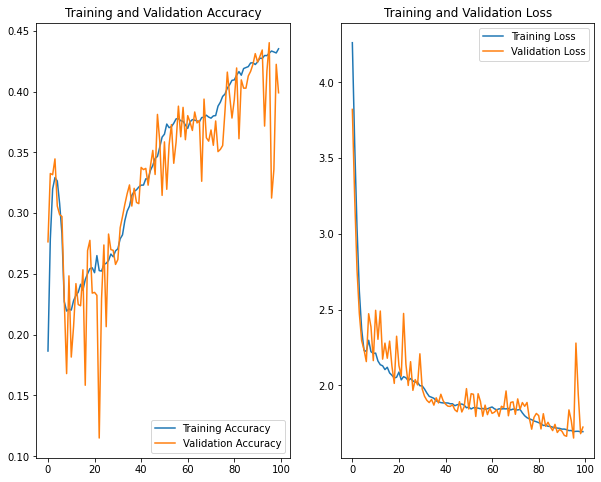

In [12]:
## accuracy train vs validation
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss=history4.history['loss']
val_loss=history4.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Increasing the drop out rate from 25% to 45% defininetly benefits the model to avoid the overfitting issue, and the accuracy rate is improved from 18% to about 40% as well. The computing time for training each epoch did not change, after all the layers are the same. 

### Question 2.5 (10 points) 

Add Earlystopping to the model and save the model at the early stopping epoch using the callbacks. 

Last, load the model and evaluate on the test set.

In [0]:
keras.backend.clear_session()

## (DNN) with 20 hidden layers of 100 neurons each
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_regularizer=regularizers.l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu")) 

## Dropout rate 45%
model.add(keras.layers.Dropout(rate=0.45))
## softmax output layer with 10 neurons
model.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
## Adam optimization
optimizer = keras.optimizers.Adam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
## Early Stopping
early_stopping = keras.callbacks.EarlyStopping(patience=15) 
# "patience" Number of epochs with no improvement after which training will be stopped. 15

In [17]:
history5= model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
1407/1407 [==============================] - 23s 16ms/step - loss: 4.2311 - accuracy: 0.1905 - val_loss: 3.7566 - val_accuracy: 0.2874
Epoch 2/100
1407/1407 [==============================] - 22s 15ms/step - loss: 3.5322 - accuracy: 0.2880 - val_loss: 3.1684 - val_accuracy: 0.3396
Epoch 3/100
1407/1407 [==============================] - 22s 16ms/step - loss: 2.9815 - accuracy: 0.3174 - val_loss: 2.6852 - val_accuracy: 0.3280
Epoch 4/100
1407/1407 [==============================] - 22s 16ms/step - loss: 2.5807 - accuracy: 0.3240 - val_loss: 2.4635 - val_accuracy: 0.3236
Epoch 5/100
1407/1407 [==============================] - 22s 16ms/step - loss: 2.3351 - accuracy: 0.3099 - val_loss: 2.3485 - val_accuracy: 0.2738
Epoch 6/100
1407/1407 [==============================] - 22s 16ms/step - loss: 2.2408 - accuracy: 0.2920 - val_loss: 2.5468 - val_accuracy: 0.2348
Epoch 7/100
1407/1407 [==============================] - 22s 16ms/step - loss: 2.1950 - accuracy: 0.2867 - val_loss: 2

In [18]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 3.7322 - accuracy: 0.1956


[3.7321581840515137, 0.1956000030040741]

The accuary rates drop significantly to 19.5%, as well the computing time in each epoch  remain about the same.  The Algorithm is stopping at the 25 epoch since it does not seems to improved the loss after that threshold

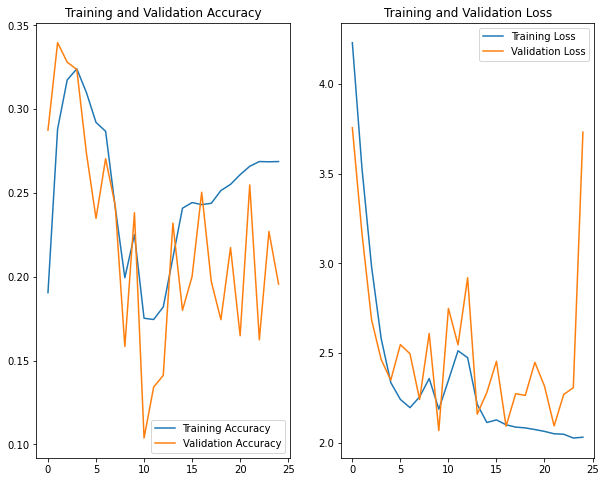

In [20]:
## accuracy train vs validation
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']

loss=history5.history['loss']
val_loss=history5.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The final model with all technicques added, such as bachnormalization, L2 regularization, dropout rate at 45% and early stopping does not resolve the issue of overfiiting. As well, the accuracy remain low! 